# Project - Programming for Data Analysis
For this project I have created a data set by simulating a real-world phenomenon - funding applications for SFI grants in Ireland. I investigated a data set that was available on data.gov.ie to see the relationships between variables in the data set.  I used this information to simulate a data set based on the existing data set. This was done by modelling and synthesising the data using Python, using the numpy.random package. <br>
<br>
The project requirements ask the user to choose a real-world phenomenon that can be measured and with at least one-hundred data points across at least four different variables. Additional requirements include <br>
• Investigate the types of variables involved, their likely distributions, and their relationships with each other. <br>
• Synthesise/simulate a data set as closely matching their properties as possible. <br>
• Detail the research and implement the simulation in a Jupyter notebook - the data set itself can simply be displayed in an output cell within the notebook. <br>
***
I have chosen a data set that includes SFI research programmes from 2011 that were managed end-to-end in SFI’s Grants and Awards Management System [1].  I'm particularly interested in this because it looks a 6 variables in the data set including applicant gender. Gender disparity has been noted to exist in grant and personnel award success rates in heath research studies in Canada [2] and the United Kingdom [3].  A variety of complex factors may be at play and Burns et al. 2019 recommend that funding agencies should monitor for gender differences in grant success rates overall and by research content [2].  It is good to see this data publically available on data.gov.ie.
<br>
## References
[1] https://data.gov.ie/dataset/sfi-gender-dashboard-2019<br>
[2] https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002935<br>
[3] https://bmjopen.bmj.com/content/bmjopen/8/4/e018625.full.pdf<br>
[4] https://numpy.org/ <br>
[5] https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib <br>
[6] https://seaborn.pydata.org/generated/seaborn.barplot.html <br>
[7] https://stackoverflow.com/questions/34498203/count-items-in-list-and-make-it-a-dictionary <br>
[8] https://www.geeksforgeeks.org/get-method-dictionaries-python/#:~:text=In%20python%20dictionaries%2C%20following%20is,a%20value%20for%20a%20key.&text=The%20get()%20method%20is,if%20present%20in%20the%20dictionary. <br>
[9] https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas <br>
[10] https://pandas.pydata.org/pandas-docs/stable/index.html<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from information from stackoverflow https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url="http://www.sfi.ie/about-us/women-in-science/gender/SFIGenderDashboard_TableauPublic_2019.csv"
df=pd.read_csv(url)
df

,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount funded
0,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,480000.0,NaN
1,SFI Investigator Programme / Principal Investi...,2014,Declined,Female,790000.0,NaN
2,SFI Investigator Project Award,2012,Declined,Female,200000.0,NaN
3,SFI Starting Investigator Research Grant,2018,Declined,Female,400000.0,NaN
4,SFI Investigator Programme / Principal Investi...,2013,Declined,Male,580000.0,NaN
...,...,...,...,...,...,...
2773,SFI Research Centres,2012,Declined,Male,13650000.0,NaN
2774,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,1090000.0,NaN
2775,SFI Investigator Programme / Principal Investi...,2016,Awarded,Male,2000000.0,2000000.0
2776,SFI Industry Fellowship,2016,Awarded,Female,60000.0,50000.0


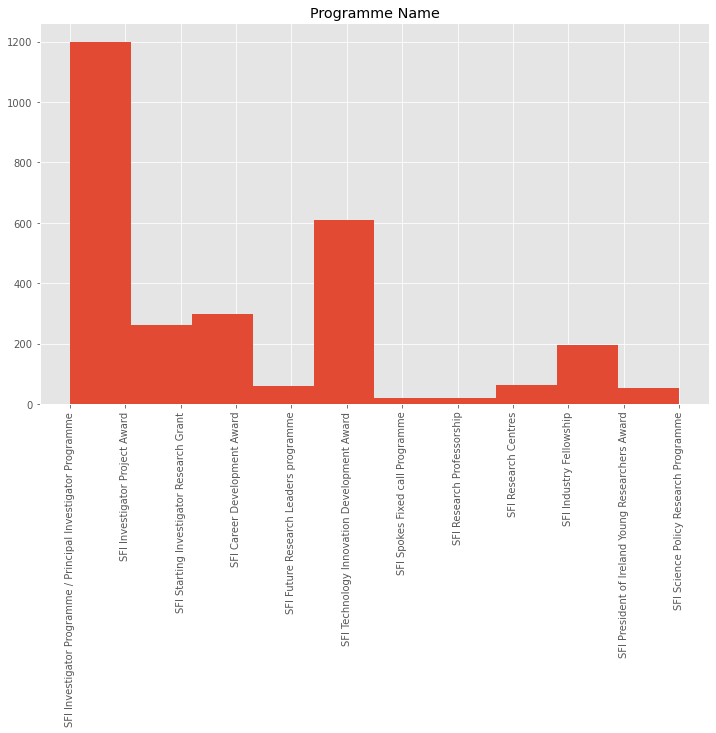

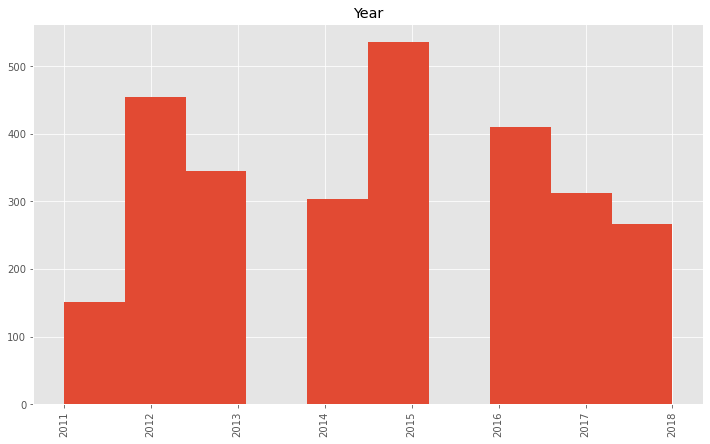

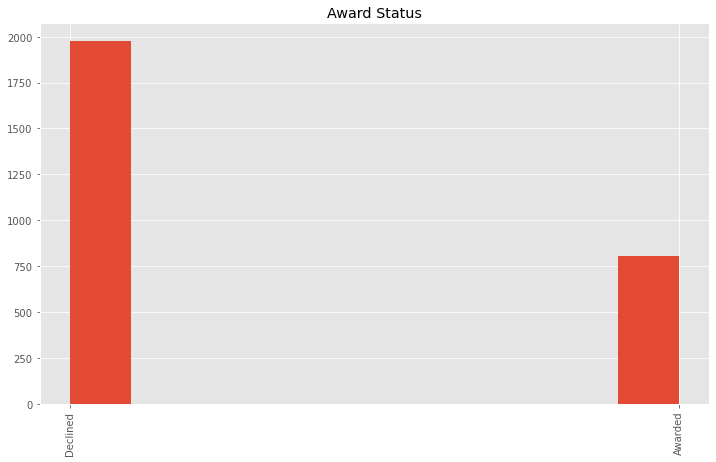

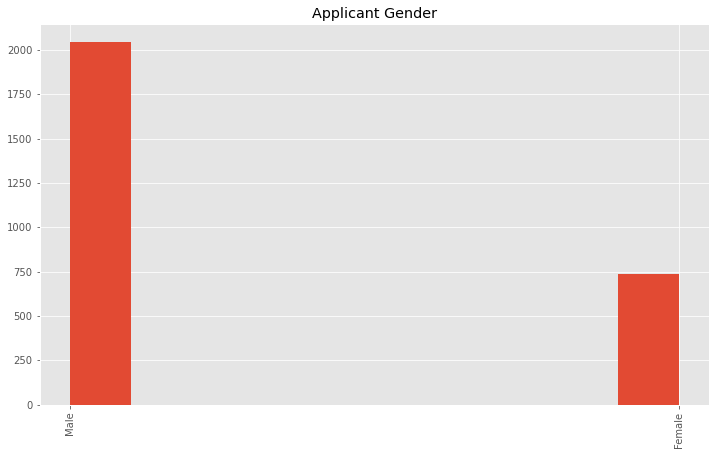

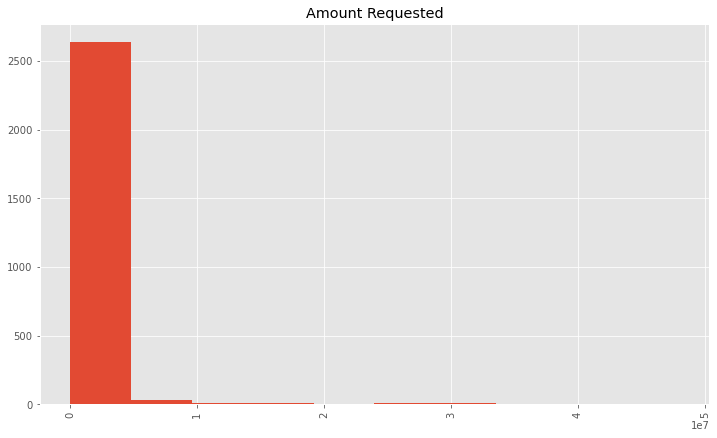

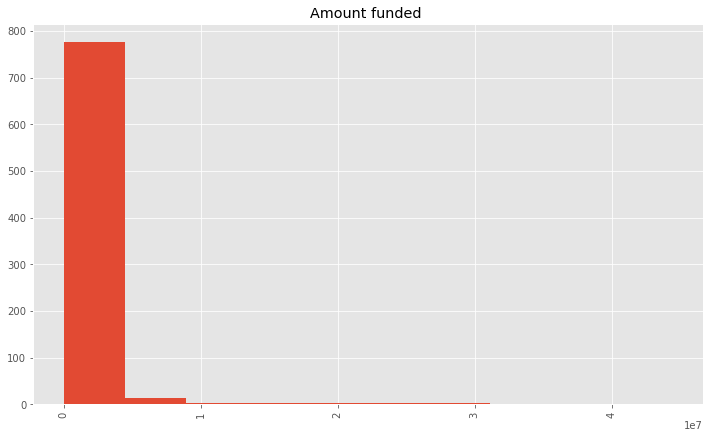

In [3]:
# the for loop will iterate through and develop histograms for each column as defined by the data frame above
# this will help us to understand the distribution of each variable
# use nicer and bigger plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,7)

for col_name in df.columns[0:6]:
    # create a histogram for each of the variables
    plt.hist(df[col_name])
    plt.title(col_name)
    # rotate the information on the x axis to aid reader [5]
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()

***
## Distributions
The histograms above indicate, as expected, there is binomial distributions for both the _Award Status_ and _Gender_.  <br>
The distribution of the _Programme Name_ resembles a right skewed distribution (similar to a Chi square disttribution) with a larger proportion of awards sought for _SFI Investigator Programme/Principal Investigator Programme_. <br>
The _Year_ variable appears to present with a normal distribution. <br> 
The _Amounts Requested_ and _Amounts Funded_ need further investigation - the presence of missing data may be influencing their distribution, but in the histogram below we can see there is a considerable range in values here which may indicate a Poisson distribution.  <br>
Further investigations of the data below also indicate that there is a difference in the proportion of awarded versus declined applications as well as differences between male and female applicants.

The breakdown of programmes is:
{'SFI Investigator Programme / Principal Investigator Programme': 926, 'SFI Investigator Project Award': 274, 'SFI Starting Investigator Research Grant': 262, 'SFI Career Development Award': 299, 'SFI Future Research Leaders programme': 59, 'SFI Technology Innovation Development Award': 609, 'SFI Spokes Fixed call Programme': 19, 'SFI Research Professorship': 19, 'SFI Research Centres': 64, 'SFI Industry Fellowship': 195, 'SFI President of Ireland Young Researchers Award': 35, 'SFI Science Policy Research Programme': 17}

The breakdown of overall award status is {'Declined': 1974, 'Awarded': 804}
The breakdown of overall gender is {'Male': 2043, 'Female': 735}


Text(0.5, 1.0, 'Amount requested')

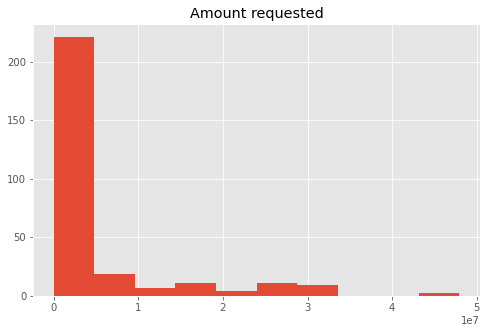

In [4]:
# this count function was created for the Assignment for Fundamentals of Data Analysis
def count(y):
    # create a dictionary which will use input as keys and the number of times each item appears in the input list as the values
    d = {}
    for i in y:
         # using .get method returns the value for the given key, if present in the dictionary 
         #If not, then it will return none [6, 7].
        d[i] = d.get(i, 0) + 1
    return d

# now to look at the number of items in each of the columns 
prog_name = df["Programme Name"]
award_status = df["Award Status"]
gender = df["Applicant Gender"]
amount_req = df["Amount Requested"]

# now we call the function
print("The breakdown of programmes is:") 
print(count(prog_name))
print("\r")
print("The breakdown of overall award status is", count(award_status))
print("The breakdown of overall gender is", count(gender))
count(amount_req)
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(8,5)
plt.hist(count(amount_req))
plt.title("Amount requested")


In [5]:
declined = 1974
awarded = 804
male = 2043
female = 735
total_applicants = 2778
Percentage_awarded = (awarded/total_applicants * 100)
Percentage_male = (male/total_applicants * 100)
Percentage_female = (female/total_applicants * 100)
print("The percentage of applicants that were successful", Percentage_awarded)
print("The percentage of male applicants is", Percentage_male)
print("The percentage of female applicants is", Percentage_female)

The percentage of applicants that were successful 28.94168466522678
The percentage of male applicants is 73.54211663066955
The percentage of female applicants is 26.457883369330453


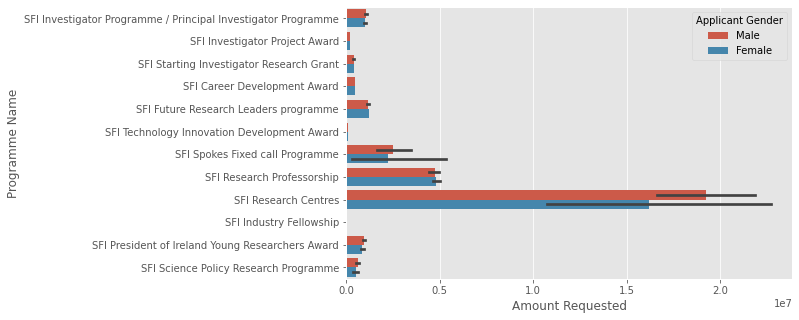

In [6]:
import seaborn as sns
ax = sns.barplot(x="Amount Requested", y="Programme Name", hue="Applicant Gender", data=df)

***
So we can see that there is very little difference between the Amount of Funding Requested by Male and Female applicants but there is a wide range of Amounts Requested across different programmes. One of the Programmes _SFI Research Centres_ has much higher Amounts Requested that the other 11 programmes.

In [7]:
df.describe()

,Year,Amount Requested,Amount funded
count,2778.000000,2.719000e+03,8.050000e+02
mean,2014.595392,1.013064e+06,9.535068e+05
std,2.060589,3.243045e+06,3.311285e+06
min,2011.000000,0.000000e+00,0.000000e+00
25%,2013.000000,1.000000e+05,9.000000e+04
50%,2015.000000,4.200000e+05,2.400000e+05
75%,2016.000000,8.700000e+05,7.000000e+05
max,2018.000000,4.794000e+07,4.444000e+07


We can see that the bottom 25% of Amounts Requested is at or below 100000, while 75% of the funding is at or below 870000 and the maximum Amount Requested is 47940000. <br>
The pairplot below shows that some of the programmes are more likely to request higher amounts of funding and there is a linear relationship between the Amount Requested and the Amount Funded when Awareded.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


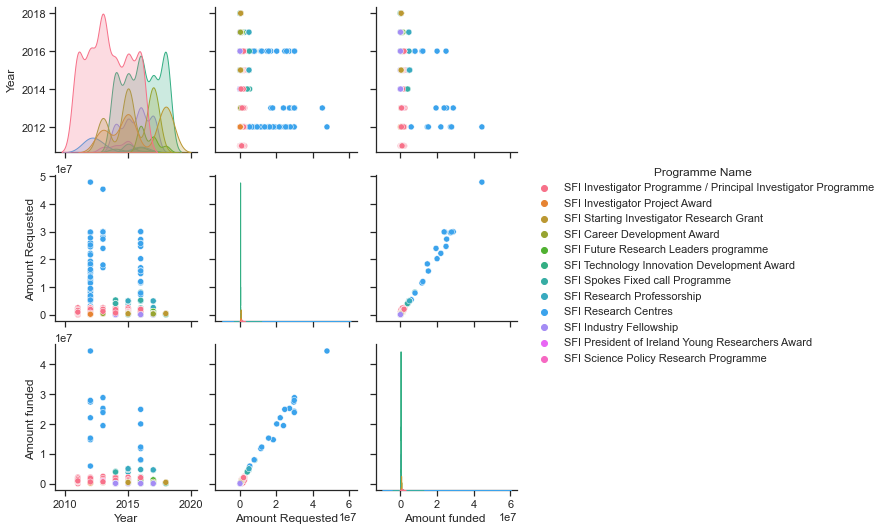

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Programme Name")
plt.show()

***
## Gender Differences
Some further investigation into the data examines the differences in Applicant Gender for each Programme.  This varies from 9.4% female applicants for the SFI Research Centres Programme to 47% for the Science Policy Research Programme. 
However, for the purpose of the model I will use the overall female applicant percentage at 27%.

In [9]:
# create a new dataframe with the data filtered to include only female applicants
App_gender = df[df["Applicant Gender"]=="Female"]
# filter this data frame to allow for exploration of data under programme names
Programme_females_app = App_gender["Programme Name"]
# create another new data frame with data filtered to include only sucessful applicants
success = df[df["Award Status"]=="Awarded"]
# filter this data frame to allow for exploaration of data under programme names
Programme_success = success["Programme Name"]
# use the count functions to count to create dictionaries of the 
# total applicants per programme
a = count(prog_name)
# female applicants per programme
b = count(Programme_females_app)
# sucessful applicants per programme
c = count(Programme_success)

In [10]:
#https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns

# create a dataframe filtered to include only female applicants who were awarded funding
success_females = df[(df["Applicant Gender"]=='Female') & (df["Award Status"]=="Awarded")]
# again break this down based on Programme Name
Prog_success_females = success_females["Programme Name"]
d = count(Prog_success_females)

In [11]:
print("The percentage of female applicants for each programme:")
for k in a.keys():
    # rounded the decimal point to 2 places
    print(k, "is", round((b[k]/a[k]*100),2))

The percentage of female applicants for each programme:
SFI Investigator Programme / Principal Investigator Programme is 18.79
SFI Investigator Project Award is 31.39
SFI Starting Investigator Research Grant is 42.75
SFI Career Development Award is 29.77
SFI Future Research Leaders programme is 28.81
SFI Technology Innovation Development Award is 27.09
SFI Spokes Fixed call Programme is 26.32
SFI Research Professorship is 10.53
SFI Research Centres is 9.38
SFI Industry Fellowship is 29.74
SFI President of Ireland Young Researchers Award is 37.14
SFI Science Policy Research Programme is 47.06


In [12]:
print("The percentage of successful applicants for each programme:")
for k in a.keys():
    # rounded the decimal point to 2 places
    print(k, "is", round((c[k]/a[k]*100),2))

The percentage of successful applicants for each programme:
SFI Investigator Programme / Principal Investigator Programme is 20.41
SFI Investigator Project Award is 18.98
SFI Starting Investigator Research Grant is 26.72
SFI Career Development Award is 23.75
SFI Future Research Leaders programme is 15.25
SFI Technology Innovation Development Award is 35.8
SFI Spokes Fixed call Programme is 42.11
SFI Research Professorship is 63.16
SFI Research Centres is 26.56
SFI Industry Fellowship is 76.92
SFI President of Ireland Young Researchers Award is 8.57
SFI Science Policy Research Programme is 29.41


In [13]:
print("The percentage of successful female applicants for each programme:")
for k in b.keys():
    # rounded the decimal point to 2 places
    print(k, "is", round((d[k]/b[k]*100),2))

The percentage of successful female applicants for each programme:
SFI Investigator Programme / Principal Investigator Programme is 16.67
SFI Investigator Project Award is 17.44
SFI Starting Investigator Research Grant is 25.0
SFI Career Development Award is 17.98
SFI Future Research Leaders programme is 35.29
SFI Spokes Fixed call Programme is 40.0
SFI Technology Innovation Development Award is 38.18
SFI President of Ireland Young Researchers Award is 15.38
SFI Industry Fellowship is 81.03
SFI Research Centres is 33.33
SFI Science Policy Research Programme is 37.5
SFI Research Professorship is 50.0


***
## Generating a data set
Using the numpy.random package I create the 6 variables that reflect the original data set but are simulated using the RNG function in Numpy [4].
To start off I have examined the distribution of the Programme Name.  For the purpose of this exercise I will model the data against the Chi Distribution with two degrees of freedom.  This total number of applicants to the programmes are presented below from highest to lowest:<br>
-'SFI Investigator Programme / Principal Investigator Programme': 926<br>
-'SFI Technology Innovation Development Award': 609<br>
-'SFI Career Development Award': 299<br>
-'SFI Investigator Project Award': 274<br>
-'SFI Starting Investigator Research Grant': 262<br>
-'SFI Industry Fellowship': 195<br>
-'SFI Research Centres': 64<br>
-'SFI Future Research Leaders programme': 59<br>
-'SFI President of Ireland Young Researchers Award': 35<br>
-'SFI Spokes Fixed call Programme': 19<br>
-'SFI Research Professorship': 19<br>
-'SFI Science Policy Research Programme': 17<br>

Using a For Loop to create a dictionary with each of the 6 variables which will act as keys and a unique value being generated for each key in the dictionary. Then these can be added to the simulated data set.

(array([510., 228., 138.,  67.,  28.,  12.,   7.,   5.,   0.,   5.]),
 array([7.95671390e-04, 1.38929105e+00, 2.77778642e+00, 4.16628180e+00,
        5.55477717e+00, 6.94327255e+00, 8.33176792e+00, 9.72026330e+00,
        1.11087587e+01, 1.24972540e+01, 1.38857494e+01]),
 <BarContainer object of 10 artists>)

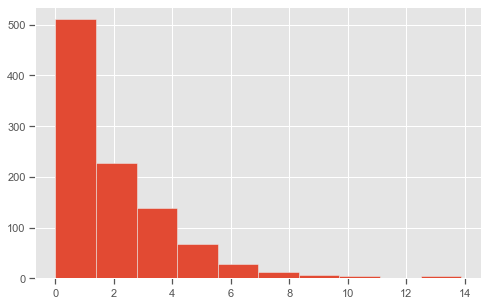

In [14]:
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng()

plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(8,5)
chi = np.random.default_rng().chisquare(df=2, size=1000)
plt.hist(chi)

In [15]:

# creating a dictionary with each variable as a key and a method of establishing the value using numpy.random

# each key is explained below
def sim_record():
    # using a chi distribution to generate a random number from a Chi Distribution
    prog = np.random.default_rng().chisquare(df=2, size=1)
    if prog < 1.0:
        prog = "SFI Investigator Programme / Principal Investigator Programme"
    elif prog < 2.0:
        prog = "SFI Technology Innovation Development Award"
    elif prog < 3.0:
        prog = rng.integers(1, 4)
        if prog == 1:
            prog = "SFI Career Development Award"
        elif prog == 2:
            prog = "SFI Investigator Project Award"
        elif prog == 3:
            prog = "SFI Starting Investigator Research Grant"
    elif prog < 4.0:
            prog = "SFI Industry Fellowship"
    elif prog < 5.0:
            prog = rng.integers(1, 4)
            if prog == 1:
                prog = "SFI Research Centres"
            elif prog == 2:
                prog = "SFI Future Research Leaders programme"
            elif prog == 3:
                prog = "SFI President of Ireland Young Researchers Award"
    elif prog > 5.0:
            prog = rng.integers(1, 4)
            if prog == 1:
                prog = "SFI Spokes Fixed call Programme"
            elif prog == 2:
                prog = "SFI Research Professorship"
            elif prog == 3:
                prog = "SFI Science Policy Research Programme"
    # any year between 2011 up to but not including 2019
    year = rng.integers(2011, 2019)
    # based on the original data, the probability of the application being successful is 0.29
    status = rng.binomial(1, 0.29)
    if status == 1:
        status = "Awarded"
    else:
        status = "Declined"
    # based on the original data, the probability of the applicant being male is 0.74
    gender = rng.binomial(1, 0.74)
    if gender == 1:
        gender = "male"
    else:
        gender = "female"
    # based on the original data, the amount requested varied from 0 to 47940000    
    req = rng.integers(5, 100)
    if prog == "SFI Research Centres":
        req = req * 300000
    elif prog == "SFI Spokes Fixed call Programme":
        req = req * 20000
    else:
        req = req * 5000
    # Amount funded will depend on the status  
    # this will be 0 if status is Declined 
    # should resemble requested amount if Awarded (with some minor variation) 
    funded = status
    if status == "Declined":
        funded = 0
    else: 
        funded = req + rng.integers(-5,5)*1000
    # create a dictionary which acts as a new simulated record for an individual entry in the new data set
    new_data = {"Programme_Name":prog,"Year":year ,"Award_Status":status ,"Applicant_Gender":gender ,"Amount_Requested":req , "Amount_funded":funded }
    return new_data

print(sim_record())    

{'Programme_Name': 'SFI Investigator Programme / Principal Investigator Programme', 'Year': 2013, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 365000, 'Amount_funded': 0}


In [16]:
# now to create a lot of model data
# starting with an empty list, build up a list of 'N' records

all_records = []   # empty list
for i in range(1000):
    # iterate (sim_record()) 1000 times and add these to the list
    all_records.append(sim_record())

# then convert the list of dicts to a DataFrame
my_df = pd.DataFrame.from_records(all_records)

my_df

,Programme_Name,Year,Award_Status,Applicant_Gender,Amount_Requested,Amount_funded
0,SFI Investigator Programme / Principal Investi...,2018,Awarded,male,340000,337000
1,SFI Science Policy Research Programme,2018,Declined,male,115000,0
2,SFI Investigator Programme / Principal Investi...,2015,Awarded,male,440000,441000
3,SFI Research Professorship,2016,Declined,male,420000,0
4,SFI Investigator Programme / Principal Investi...,2015,Awarded,male,30000,27000
...,...,...,...,...,...,...
995,SFI Investigator Programme / Principal Investi...,2014,Declined,male,60000,0
996,SFI Investigator Programme / Principal Investi...,2012,Awarded,male,90000,93000
997,SFI Investigator Programme / Principal Investi...,2014,Declined,male,210000,0
998,SFI Investigator Programme / Principal Investi...,2017,Awarded,male,155000,159000


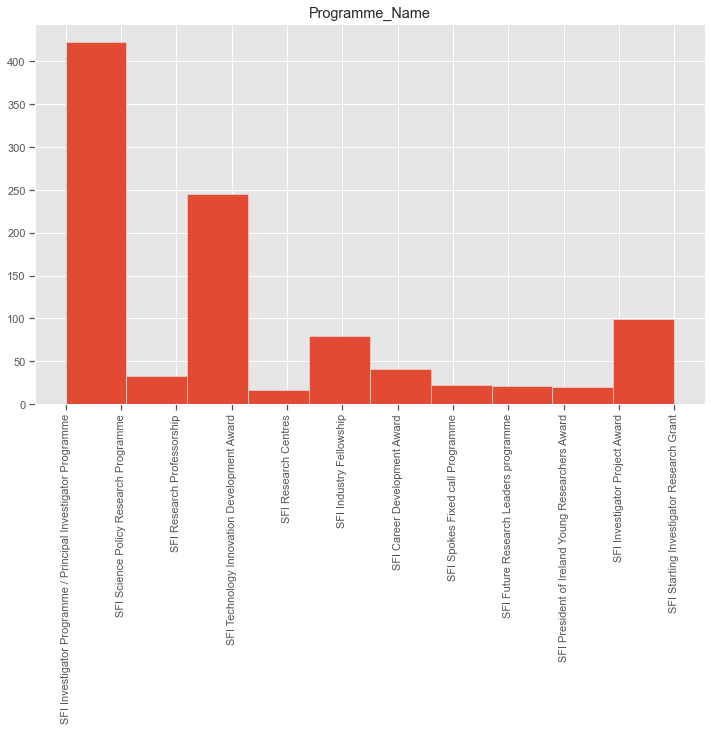

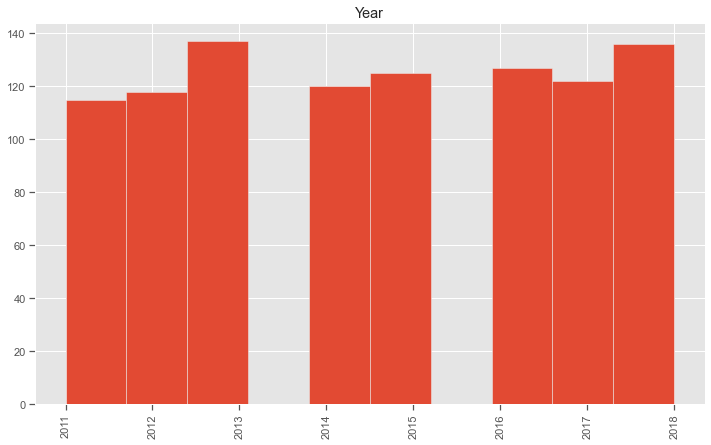

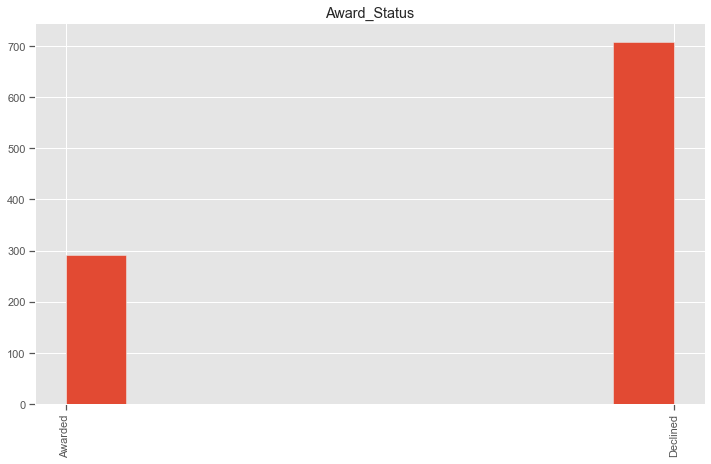

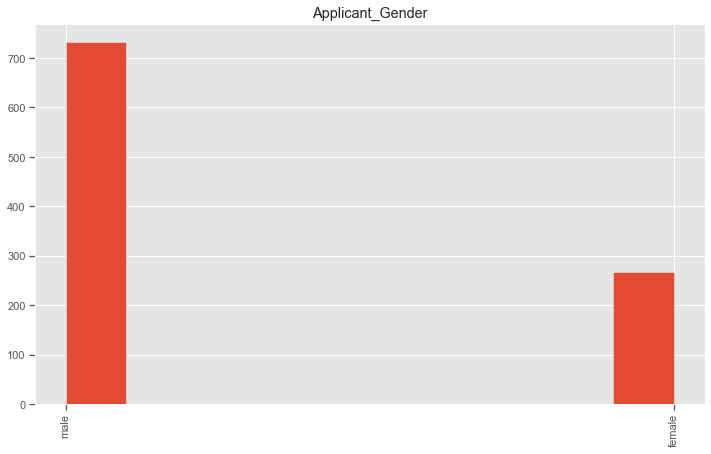

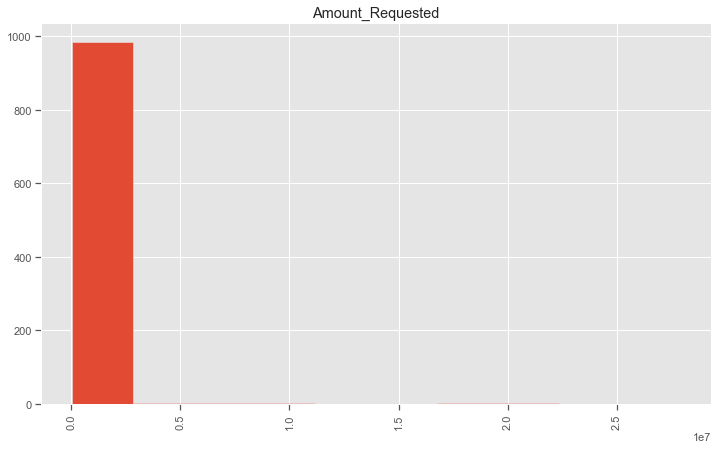

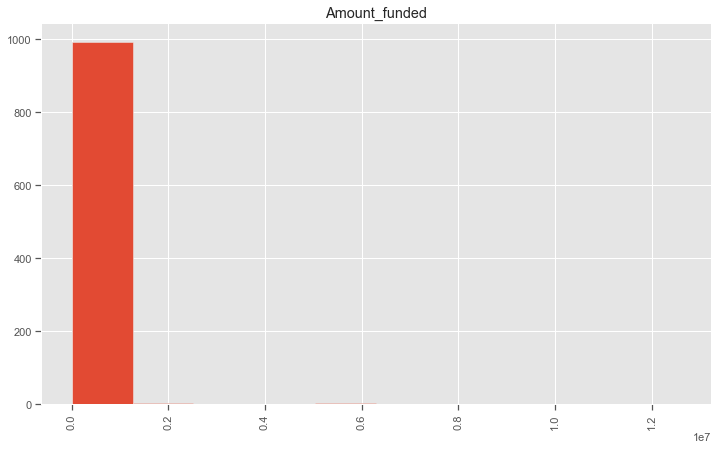

In [17]:
# using the methods to examine the original data
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,7)

for col_name in my_df.columns[0:6]:
    # create a histogram for each of the variables
    plt.hist(my_df[col_name])
    plt.title(col_name)
    # rotate the information on the x axis to aid reader
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()

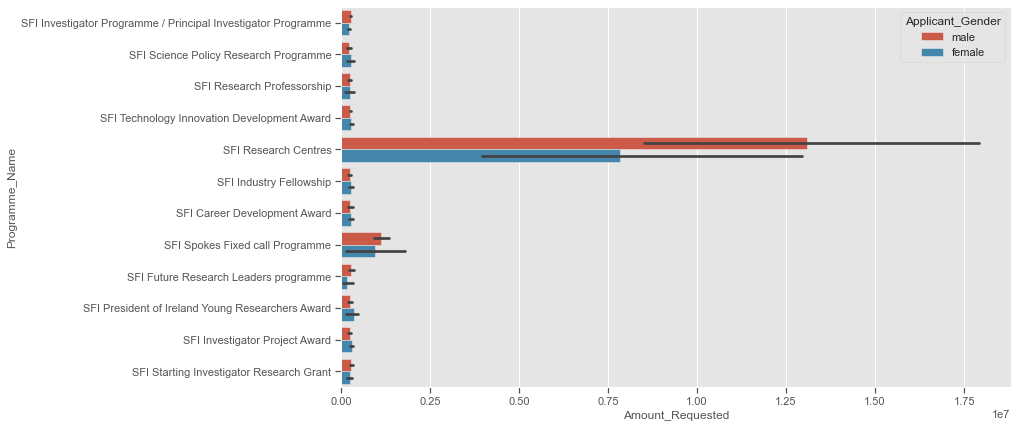

In [18]:
import seaborn as sns
ax = sns.barplot(x="Amount_Requested", y="Programme_Name", hue="Applicant_Gender", data=my_df)

The breakdown of programmes is:
{'SFI Investigator Programme / Principal Investigator Programme': 401, 'SFI Science Policy Research Programme': 22, 'SFI Research Professorship': 33, 'SFI Technology Innovation Development Award': 245, 'SFI Research Centres': 16, 'SFI Industry Fellowship': 80, 'SFI Career Development Award': 41, 'SFI Spokes Fixed call Programme': 22, 'SFI Future Research Leaders programme': 21, 'SFI President of Ireland Young Researchers Award': 20, 'SFI Investigator Project Award': 49, 'SFI Starting Investigator Research Grant': 50}

The breakdown of overall award status is {'Awarded': 291, 'Declined': 709}
The breakdown of overall gender is {'male': 733, 'female': 267}


,Year,Amount_Requested,Amount_funded
count,1000.000000,1.000000e+03,1.000000e+03
mean,2014.571000,4.576450e+05,1.141880e+05
std,2.286961,1.663712e+06,5.484849e+05
min,2011.000000,2.500000e+04,0.000000e+00
25%,2013.000000,1.450000e+05,0.000000e+00
50%,2015.000000,2.900000e+05,0.000000e+00
75%,2017.000000,4.000000e+05,8.100000e+04
max,2018.000000,2.790000e+07,1.259600e+07


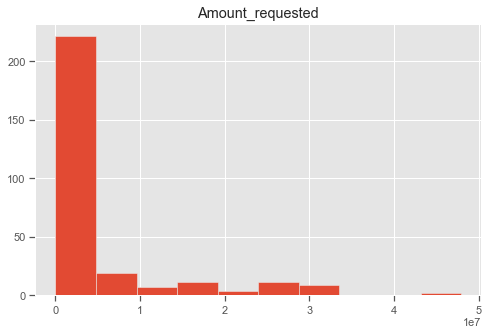

In [22]:
# to provide some additional information on the simulated data 
# this can be compared with the information from the original data
prog_name2 = my_df["Programme_Name"]
award_status2 = my_df["Award_Status"]
gender2 = my_df["Applicant_Gender"]
amount_req2 = my_df["Amount_Requested"]

print("The breakdown of programmes is:") 
print(count(prog_name2))
print("\r")
print("The breakdown of overall award status is", count(award_status2))
print("The breakdown of overall gender is", count(gender2))
count(amount_req2)
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(8,5)
plt.hist(count(amount_req))
plt.title("Amount_requested")

my_df.describe()



In [23]:
declined = 709
awarded = 291
male = 733
female = 267
total_applicants = 1000
Percentage_awarded = (awarded/total_applicants * 100)
Percentage_male = (male/total_applicants * 100)
Percentage_female = (female/total_applicants * 100)
print("The percentage of applicants that were successful", Percentage_awarded)
print("The percentage of male applicants is", Percentage_male)
print("The percentage of female applicants is", Percentage_female)

The percentage of applicants that were successful 29.099999999999998
The percentage of male applicants is 73.3
The percentage of female applicants is 26.700000000000003


Although there are simalarities between the simulated data set and the original data set, the simulated data is not exactly like the original data set.  This is likely because I haven't taken into account all of the relationships and complexities of the data. The model would benefit from further refinements to take all relationships into account. <br>
With hindsight it would have been better to choose a data set with more variables with scaler rather than categorical data.


The End